In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,VotingRegressor,AdaBoostRegressor
from sklearn.svm import SVR

In [3]:
data1 = pd.read_csv('datasets/gt_full.csv')
print(data1)

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  


In [4]:
print(data1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB
None


In [5]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,17.712726,7.447451,-6.234800,11.7810,17.8010,23.6650,37.1030
AP,36733.0,1013.070165,6.463346,985.850000,1008.8000,1012.6000,1017.0000,1036.6000
AH,36733.0,77.867015,14.461355,24.085000,68.1880,80.4700,89.3760,100.2000
AFDP,36733.0,3.925518,0.773936,2.087400,3.3556,3.9377,4.3769,7.6106
GTEP,36733.0,25.563801,4.195957,17.698000,23.1290,25.1040,29.0610,40.7160
TIT,36733.0,1081.428084,17.536373,1000.800000,1071.8000,1085.9000,1097.0000,1100.9000
TAT,36733.0,546.158517,6.842360,511.040000,544.7200,549.8800,550.0400,550.6100
TEY,36733.0,133.506404,15.618634,100.020000,124.4500,133.7300,144.0800,179.5000
CDP,36733.0,12.060525,1.088795,9.851800,11.4350,11.9650,12.8550,15.1590
CO,36733.0,2.372468,2.262672,0.000388,1.1824,1.7135,2.8429,44.1030


In [6]:
detail = pd.read_csv('gasturbine.csv')

detail

,variable(Abbr.),Unit,Min,Max,Mean
0,Ambient temperature (AT),C degree,6.23,37.10,17.71
1,Ambient pressure (AP),mbar,985.85,1036.56,1013.07
2,Ambient humidity (AH),(%),24.08,100.20,77.87
3,Air filter difference pressure (AFDP),mbar,2.09,7.61,3.93
4,Gas turbine exhaust pressure (GTEP),mbar,17.70,40.72,25.56
5,Turbine inlet temperature (TIT),C,1000.85,1100.89,1081.43
6,Turbine after temperature (TAT),C,511.04,550.61,546.16
7,Compressor discharge pressure (CDP),mbar,9.85,15.16,12.06
8,Turbine energy yield (TEY),MWH,100.02,179.50,133.51
9,Carbon monoxide (CO),mg/m3,0.00,44.10,2.37


In [7]:
stdx = data1.apply(lambda x : (x - np.mean(x))/np.std(x))
stdx

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,-0.904182,1.426499
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,-0.850611,1.462891
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006
...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530


In [8]:
stdx.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,-1.176081e-16,1.000014,-3.215577,-0.796488,0.011853,0.799247,2.603647
AP,36733.0,-1.233647e-14,1.000014,-4.211524,-0.660683,-0.072744,0.608027,3.640553
AH,36733.0,-5.570912e-16,1.000014,-3.719067,-0.669311,0.179998,0.795855,1.544343
AFDP,36733.0,-1.015144e-15,1.000014,-2.375059,-0.736399,0.015741,0.583238,4.761549
GTEP,36733.0,5.292366e-16,1.000014,-1.874640,-0.580281,-0.109583,0.833480,3.611191
TIT,36733.0,9.609823e-15,1.000014,-4.597825,-0.549043,0.255012,0.887990,1.110388
TAT,36733.0,-8.300659e-15,1.000014,-5.132585,-0.210240,0.543896,0.567280,0.650586
TEY,36733.0,9.888369e-16,1.000014,-2.144032,-0.579854,0.014316,0.676995,2.944830
CDP,36733.0,-4.704326e-16,1.000014,-2.028623,-0.574519,-0.087736,0.729692,2.845821
CO,36733.0,-7.427883e-17,1.000014,-1.048368,-0.525964,-0.291239,0.207913,18.443286


In [9]:
co = stdx['CO']
print(co)

0       -0.904182
1       -0.850611
2       -0.849020
3       -0.946415
4       -0.930328
           ...   
36728    3.809943
36729    3.876679
36730    3.996008
36731    0.415856
36732    4.246601
Name: CO, Length: 36733, dtype: float64


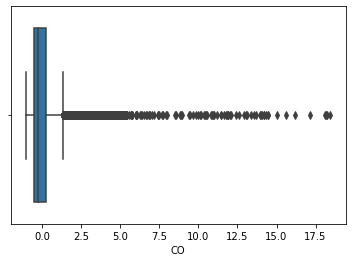

In [10]:
sns.boxplot(stdx.CO)
plt.show()

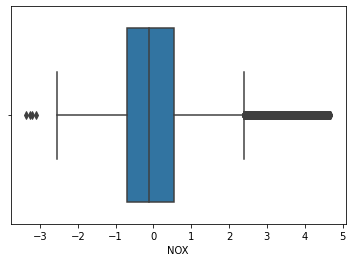

In [11]:
sns.boxplot(stdx.NOX)
plt.show()

In [12]:
for i in range(0,11):
    print(stdx.iloc[:,i:i+1].skew())
    print("-------------------------")

AT   -0.043547
dtype: float64
-------------------------
AP    0.194121
dtype: float64
-------------------------
AH   -0.628034
dtype: float64
-------------------------
AFDP    0.381097
dtype: float64
-------------------------
GTEP    0.329021
dtype: float64
-------------------------
TIT   -0.888278
dtype: float64
-------------------------
TAT   -1.755907
dtype: float64
-------------------------
TEY    0.116555
dtype: float64
-------------------------
CDP    0.236792
dtype: float64
-------------------------
CO    4.838174
dtype: float64
-------------------------
NOX    1.026779
dtype: float64
-------------------------


# Making model 

In [13]:
data = stdx 
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273,-0.904182,1.426499
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783,-0.850611,1.462891
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006
...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530


In [14]:
x = data.iloc[:,0:9]
y = data.iloc[:,9:10]
z = data.iloc[:,10:11]


# Model 1 CO model 

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(29386, 9)
(7347, 9)
(29386, 1)
(7347, 1)


In [16]:
from sklearn.linear_model import SGDRegressor,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,VotingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [17]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(splitter='best',)
rfr = RandomForestRegressor()
svr = SVR()
sgd = SGDRegressor(max_iter=100,learning_rate='constant')
ests = [('lr',lr),('dtr',dtr),('rfr',rfr),('svr',svr),('sgd',sgd)]

In [18]:
for est in ests:
    score = cross_val_score(est[1],xtrain,ytrain,scoring='r2',cv=10,)
    print(est[0],np.mean(score))

lr 0.5595416515881588
dtr 0.5449044699793509
rfr 0.7628558096172487
svr 0.7053678125669325
sgd 0.540599948897085


In [19]:
vr = VotingRegressor(ests)
scoringg = cross_val_score(vr,xtrain,ytrain,scoring='r2',cv=10)
print("Voting regressor = ",np.mean(scoringg))

Voting regressor =  0.7143364651169627


In [20]:
vr1 = VotingRegressor(ests)
vr1.fit(xtrain,ytrain)
ypred = vr1.predict(xtest)
print(ypred)
print("R2 score = ",r2_score(ytest,ypred))

[-0.52701722 -0.50425168 -0.50134957 ... -0.6954272   0.47139519
 -0.40318535]
R2 score =  0.7467570157170047


In [21]:
er = xtest.sample()
er = list(er.values)
print(er)
ypred1 = vr1.predict(er)
ypred1[0]

[array([ 0.90411675, -1.0320128 ,  0.80491372,  0.19198537, -0.09409217,
       -0.18408183,  0.62720187, -0.29621453, -0.18509254])]


-0.1658438106469583

# Model 2  for NOX 

In [22]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,z,test_size=0.2,random_state=42)
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

(29386, 9)
(7347, 9)
(29386, 1)
(7347, 1)


In [23]:
lr = LinearRegression()
dtr = DecisionTreeRegressor(splitter='best',)
rfr = RandomForestRegressor()
svr = SVR()
sgd = SGDRegressor(max_iter=100,learning_rate='constant')
ests = [('lr',lr),('dtr',dtr),('rfr',rfr),('svr',svr),('sgd',sgd)]

In [24]:
for est in ests:
    score = cross_val_score(est[1],xtrain1,ytrain1,scoring='r2',cv=10,)
    print(est[0],np.mean(score))

lr 0.5227677730951266
dtr 0.7270109784498836
rfr 0.8700482192448383
svr 0.8009675964288782
sgd 0.4986898009444484


In [25]:
vr2 = VotingRegressor(ests)
vr2.fit(xtrain1,ytrain1)
ypred1 = vr2.predict(xtest1)
print(ypred1)
print("R2 score = ",r2_score(ytest1,ypred1))

[-0.34858888 -0.28391858  0.73487493 ... -0.34854494 -1.26520624
  1.0629743 ]
R2 score =  0.7893837603832901


In [26]:
er = xtest.sample()
er = list(er.values)
print(er)
ypred2 = vr2.predict(er)
ypred2[0]

[array([-1.48767366,  1.02577292,  0.90953881,  0.11096977, -0.42632123,
        0.21509394,  0.56728021,  0.00983432, -0.19152175])]


1.2695171993902945

In [27]:
xtest.iloc[0:1,:]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
18618,0.689275,-0.181049,-0.157734,-0.009972,-0.046427,0.488814,0.516128,0.020719,0.025235


In [28]:
ytest.iloc[0:1,:]

,CO
18618,-0.184903


In [29]:
ytest1.iloc[0:1,:]

,NOX
28828,-0.449133


In [30]:
ab = xtest.iloc[0:1,:]
yp = vr1.predict(ab)
yp1 = vr2.predict(ab)
print("Predicted CO = ",yp)
print("Predicted NOx = ",yp1)

Predicted CO =  [-0.52701722]
Predicted NOx =  [-0.09525859]


In [31]:
ent = int(input("Enter number of particular row number of test = "))
print("rows=\n",xtest.iloc[ent:ent+1,:])
print("\n")
print("True CO value = ",ytest.iloc[ent:ent+1,:])
print("\n")
print("True NOx value = ",ytest1.iloc[ent:ent+1,:])
print("==========================================")
a = xtest.iloc[ent:ent+1,:]
b = vr1.predict(a)
c = vr2.predict(a)
print("Predicted CO = ",b)
print("Predicted NOx = ",c)

Enter number of particular row number of test = 23
rows=
              AT        AP        AH      AFDP      GTEP       TIT       TAT  \
35773  0.028772  1.644656 -0.280753 -0.636389 -0.255202 -0.081437  0.571665   

            TEY       CDP  
35773 -0.154075 -0.083144  


True CO value =               CO
35773 -0.553985


True NOx value =             NOX
9534  3.121794
Predicted CO =  [0.11079452]
Predicted NOx =  [-0.67221614]


In [32]:
from sklearn.metrics import mean_squared_error
print("MSE of CO Machine = ",np.round(mean_squared_error(ytest,ypred),3))
print("MSE of NOx Machine = ",np.round(mean_squared_error(ytest1,ypred1),3))
from sklearn.metrics import mean_absolute_error
print("MAE of CO Machine = ",np.round(mean_absolute_error(ytest,ypred),3))
print("MAE of NOx Machine = ",np.round(mean_absolute_error(ytest1,ypred1),3))
from sklearn.metrics import r2_score
print("R2 of CO Machine = ",np.round(r2_score(ytest,ypred),3))
print("R2 of NOx Machine = ",np.round(r2_score(ytest1,ypred1),3))

MSE of CO Machine =  0.235
MSE of NOx Machine =  0.205
MAE of CO Machine =  0.26
MAE of NOx Machine =  0.317
R2 of CO Machine =  0.747
R2 of NOx Machine =  0.789


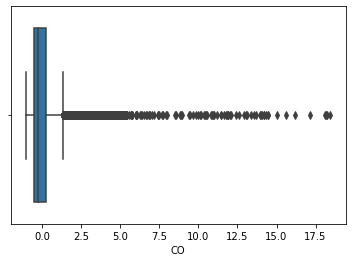

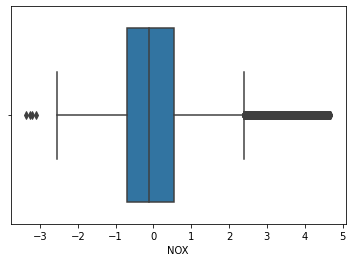

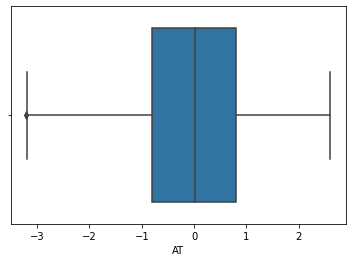

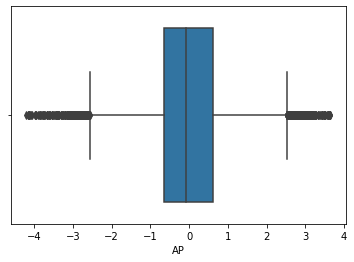

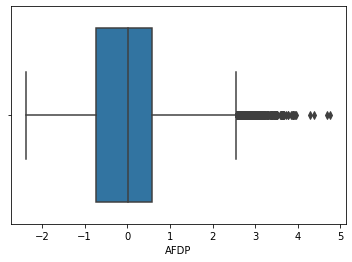

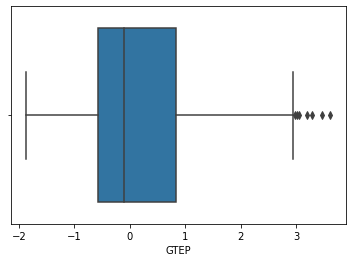

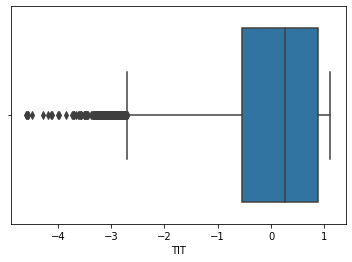

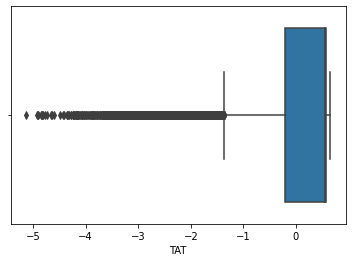

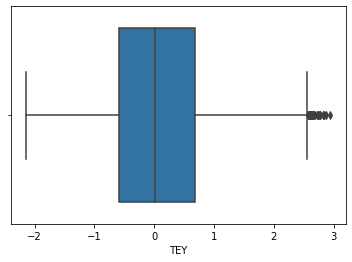

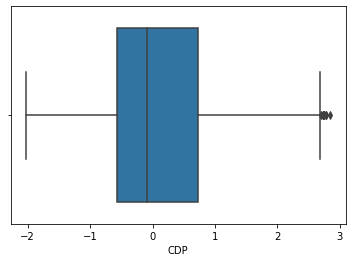

In [33]:
sns.boxplot(data.CO)
plt.show()
sns.boxplot(data.NOX)
plt.show()
sns.boxplot(data.AT)
plt.show()
sns.boxplot(data.AP)
plt.show()
sns.boxplot(data.AFDP)
plt.show()
sns.boxplot(data.GTEP)
plt.show()
sns.boxplot(data.TIT)
plt.show()
sns.boxplot(data.TAT)
plt.show()
sns.boxplot(data.TEY)
plt.show()
sns.boxplot(data.CDP)
plt.show()

In [34]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [35]:
import random 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
f_data = []
for i in range(0,10):
    AT = random.randrange(623, 3710) / 100
    AP = random.randrange(98585,103656)/100
    AH = random.randrange(2408,10020) /100
    AFDP =  random.randrange(209,761) /100
    GTEP =  random.randrange(1770,4072) /100
    TIT =  random.randrange(100085,110089) /100
    TAT =  random.randrange(51104,55061) /100
    CDP =  random.randrange(985,1516) /100
    TEY =  random.randrange(10002,17950) /100

    pr = [AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,TEY]
    data_arry = np.array(pr).reshape(-1,1)
    
    stdx = std.fit_transform(data_arry)
    #print(stdx.flatten())
    f_data.append(stdx.flatten())
print(f_data)

[array([-0.67855416,  1.74608656, -0.68161469, -0.75463009, -0.7022368 ,
        1.73467032,  0.49267986, -0.72499643, -0.43140457]), array([-0.70074006,  1.66218181, -0.65455613, -0.76475884, -0.68693401,
        1.79483777,  0.53922461, -0.73879266, -0.45046249]), array([-0.74875075,  1.64770054, -0.60528503, -0.7665442 , -0.70643055,
        1.81841552,  0.49968304, -0.75203233, -0.38675624]), array([-0.73549081,  1.7635605 , -0.63995585, -0.74083082, -0.68560196,
        1.69094613,  0.55281697, -0.72320147, -0.48224269]), array([-0.69782561,  1.6929747 , -0.70998055, -0.7678213 , -0.71200227,
        1.74319704,  0.56355146, -0.74526193, -0.36683155]), array([-0.70297419,  1.73636828, -0.65048969, -0.7606215 , -0.72954676,
        1.73382357,  0.49837029, -0.7491214 , -0.37580858]), array([-0.6839992 ,  1.73079654, -0.67094902, -0.75665495, -0.70577393,
        1.74113404,  0.50747697, -0.74138087, -0.42064958]), array([-0.70127052,  1.74444964, -0.55095393, -0.76103938, -0.715385

# Anomaly detection or Outlier Detections


In [103]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate,NOX_Contaminate,CO_Contaminate
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,0,0,0
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,0,0,0
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,0,0,0
5,-1.856624,0.716331,0.420366,-0.443347,-0.395815,0.260714,0.558511,0.074502,-0.176826,-0.944798,1.409030,0,0,0
6,-1.885641,0.762748,0.431984,-0.445932,-0.399152,0.255012,0.567280,0.075142,-0.168560,-0.852256,1.652561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745,0,0,0
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086,0,0,0
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011,0,0,0
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530,0,0,0


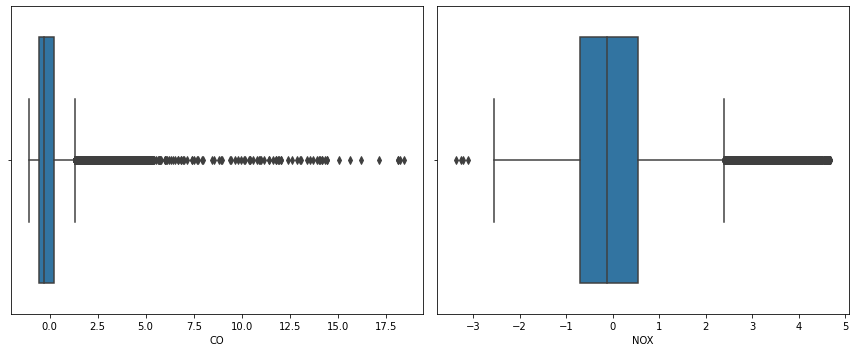

In [104]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1) 
sns.boxplot(data.CO)
plt.subplot(1, 2, 2)
sns.boxplot(data.NOX)
plt.tight_layout()  
plt.show()

# Anomaly model for CO

In [162]:
#since our data of CO is highly skew so we use IQR 
print("Skewed data = ",data.CO.skew())
q3 = data['CO'].quantile(0.97)
q1 = data['CO'].quantile(0.09)
IQR = q3-q1
highest = q3+(1.5*IQR)
lowest = q1-(1.5*IQR)
print(highest,lowest)

Skewed data =  4.838240285035024
6.845742806565891 -5.29136155403897


In [163]:
data[(data['CO']>=highest)|(data['CO']<=lowest)].shape

(64, 14)

In [164]:
data['CO_Contaminate'] = np.where(data['CO']>=highest,1,0)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate,NOX_Contaminate,CO_Contaminate
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,0,0,0
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,0,0,0
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,0,0,0
5,-1.856624,0.716331,0.420366,-0.443347,-0.395815,0.260714,0.558511,0.074502,-0.176826,-0.944798,1.409030,0,0,0
6,-1.885641,0.762748,0.431984,-0.445932,-0.399152,0.255012,0.567280,0.075142,-0.168560,-0.852256,1.652561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745,0,0,0
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086,0,0,0
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011,0,0,0
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530,0,0,0


In [165]:
data[data['CO_Contaminate']==1].shape

(64, 14)

In [166]:
data.shape

(36731, 14)

# Anomaly for NOx

In [167]:
print("skewness of Nox = ",data['NOX'].skew())
NOX = data['NOX']
high = NOX.mean()+3*NOX.std()
low = NOX.mean()-3*NOX.std()
print(high,low)

skewness of Nox =  1.0269977056018833
2.999873343620556 -3.000030670655634


In [168]:
data[(data['NOX']>=high)|(data['NOX']<=low)].shape

(546, 14)

In [169]:
data['NOX_Contaminate'] = np.where(data['NOX']>=high,1,0)
#data['NOX_Contaminate'] = np.where(data['NOX']<=low,1,0)
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate,NOX_Contaminate,CO_Contaminate
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,0,0,0
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,0,0,0
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,0,0,0
5,-1.856624,0.716331,0.420366,-0.443347,-0.395815,0.260714,0.558511,0.074502,-0.176826,-0.944798,1.409030,0,0,0
6,-1.885641,0.762748,0.431984,-0.445932,-0.399152,0.255012,0.567280,0.075142,-0.168560,-0.852256,1.652561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745,0,0,0
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086,0,0,0
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011,0,0,0
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530,0,0,0


In [241]:
datasd = data[(data['NOX_Contaminate']==1) & (data['CO_Contaminate']==1)]
datasd.to_csv('contaminate.csv',index=False)

In [171]:
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate,NOX_Contaminate,CO_Contaminate
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,0,0,0
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,0,0,0
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,0,0,0
5,-1.856624,0.716331,0.420366,-0.443347,-0.395815,0.260714,0.558511,0.074502,-0.176826,-0.944798,1.409030,0,0,0
6,-1.885641,0.762748,0.431984,-0.445932,-0.399152,0.255012,0.567280,0.075142,-0.168560,-0.852256,1.652561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745,0,0,0
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086,0,0,0
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011,0,0,0
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530,0,0,0


In [172]:
data.to_csv('final_datasets.csv',index=False)

# loading data 

In [173]:
fdata = pd.read_csv('final_datasets.csv')
fdata

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_contaminate,NOX_Contaminate
0,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015,-0.849020,1.582687,0,0
1,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774,-0.946415,1.473852,0,0
2,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251,-0.930328,1.433006,0,0
3,-1.856624,0.716331,0.420366,-0.443347,-0.395815,0.260714,0.558511,0.074502,-0.176826,-0.944798,1.409030,0,0
4,-1.885641,0.762748,0.431984,-0.445932,-0.399152,0.255012,0.567280,0.075142,-0.168560,-0.852256,1.652561,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36726,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021,3.809943,2.044745,0,0
36727,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558,3.876679,2.017086,0,0
36728,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179,3.996008,2.642011,0,0
36729,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917,0.415856,-0.047530,0,0


In [174]:
x = fdata.iloc[:,0:11]
x.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [175]:
y = fdata.iloc[:,11:12]
y.columns

Index(['CO_contaminate'], dtype='object')

In [176]:
z = fdata.iloc[:,12:13]
z.columns

Index(['NOX_Contaminate'], dtype='object')

# Data split

In [177]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25) #CO
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x,z,test_size=0.25) #NOX

In [178]:
#CO data split
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(xtrain.columns)
print(ytest.columns)

(27548, 11)
(9183, 11)
(27548, 1)
(9183, 1)
Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')
Index(['CO_contaminate'], dtype='object')


In [179]:
#NOX data split
print(xtrain1.shape)
print(xtest1.shape)
print(ytrain1.shape)
print(ytest1.shape)
print(xtrain1.columns)
print(ytest1.columns)

(27548, 11)
(9183, 11)
(27548, 1)
(9183, 1)
Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')
Index(['NOX_Contaminate'], dtype='object')


# CO Classification Model 

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report
from sklearn.svm import SVC

In [181]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier(criterion='gini',splitter='random')
rfc = RandomForestClassifier(n_estimators=200,criterion='gini')
svc = SVC(kernel='linear')

est2s = [('lgr',lgr),('dtc',dtc),('rfc',rfc),('svc',svc)]

In [182]:
for est in est2s:
    scorex = cross_val_score(est[1],xtrain,ytrain,cv=12,scoring='accuracy')
    print(est[1],np.round(np.mean(scorex)))

LogisticRegression() 1.0
DecisionTreeClassifier(splitter='random') 1.0
RandomForestClassifier(n_estimators=200) 1.0
SVC(kernel='linear') 1.0


In [183]:
vtc1 = VotingClassifier(est2s)
vtc1.fit(xtrain,ytrain)
pred1 = vtc1.predict(xtest)
print("Accuracy score = ",accuracy_score(ytest,pred1))

Accuracy score =  0.9997822062506806


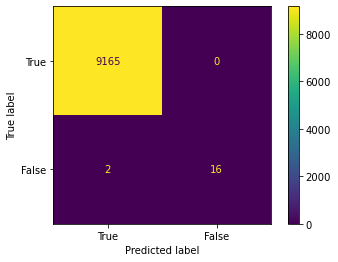

In [184]:
cmfvc = confusion_matrix(ytest,pred1)
ConfusionMatrixDisplay(confusion_matrix=cmfvc,display_labels=[True,False]).plot()
plt.show()

# NOX Classification Model

In [185]:
print(xtrain1)
print(ytrain1)

             AT        AP        AH      AFDP      GTEP       TIT       TAT  \
29146 -0.642205  1.010301 -0.643587 -0.589615  1.081818  0.865180  0.536589   
28795 -0.527802 -0.521434  0.601610 -1.557150 -0.695155 -0.851276  0.564357   
26330  1.660762 -0.490490 -1.146244  0.836363  0.583474  0.734022  0.540973   
19386  0.542109 -0.320297  0.863554 -0.278215 -0.993065 -0.794251  0.574588   
1594  -1.103994  0.901996  0.708310  0.462683 -0.431326  0.203689  0.571665   
...         ...       ...       ...       ...       ...       ...       ...   
6558  -0.626361  1.288798 -0.773798 -0.326023 -0.825520 -0.429290  0.551204   
10346  1.098280 -0.753515 -0.603895 -0.637165 -1.075765 -1.010946  0.600895   
22829 -0.486982  0.840108  0.823031 -0.979834 -0.735194 -1.147806  0.573126   
1006  -1.613289  0.515195 -0.278955 -0.044601 -0.544532  0.055424  0.590664   
15082 -0.892630  1.691072  0.985605 -1.212673 -0.336710  0.255012  0.526358   

            TEY       CDP        CO       NOX  
291

In [190]:
lgr = LogisticRegression()
dtc = DecisionTreeClassifier(criterion='gini',splitter='random')
rfc = RandomForestClassifier(n_estimators=200,criterion='gini')
svc = SVC(kernel='rbf')

est2s = [('lgr',lgr),('dtc',dtc),('rfc',rfc),('svc',svc)]

In [191]:
for est in est2s:
    scorex = cross_val_score(est[1],xtrain1,ytrain1,cv=12,scoring='accuracy')
    print(est[1],np.round(np.mean(scorex)))

LogisticRegression() 1.0
DecisionTreeClassifier(splitter='random') 1.0
RandomForestClassifier(n_estimators=200) 1.0
SVC() 1.0


In [192]:
vtc2 = VotingClassifier(est2s)
vtc2.fit(xtrain1,ytrain1)
pred2 = vtc1.predict(xtest1)
print("Accuracy score = ",accuracy_score(ytest1,pred2))

Accuracy score =  0.9825765000544484


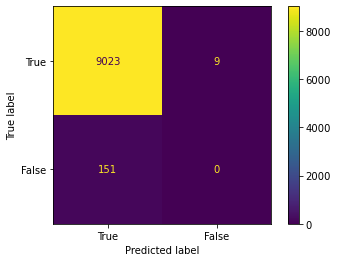

In [193]:
cmfvc1 = confusion_matrix(ytest1,pred2)
ConfusionMatrixDisplay(confusion_matrix=cmfvc1,display_labels=[True,False]).plot()
plt.show()

# Try BaggingClassifier

# CO Model2

In [199]:
from sklearn.ensemble import BaggingClassifier
bgc1 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=20)
bgc1.fit(xtrain,ytrain)
pred3 = bgc1.predict(xtest)
print("Accuracy score = ",accuracy_score(ytest,pred3))

Accuracy score =  1.0


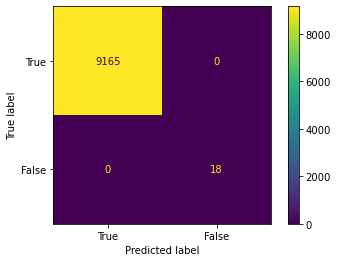

In [200]:
cmfbg1 = confusion_matrix(ytest,pred3)
ConfusionMatrixDisplay(cmfbg1,display_labels=[True,False]).plot()
plt.show()

# NOX Model2

In [201]:
bgc2 = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=20)
bgc2.fit(xtrain1,ytrain1)
pred4 = bgc2.predict(xtest1)
print("Accuracy Score = ",accuracy_score(ytest1,pred4))

Accuracy Score =  1.0


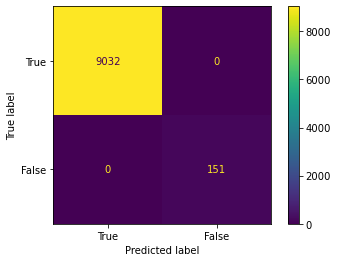

In [202]:
cmfbg2 = confusion_matrix(ytest1,pred4)
ConfusionMatrixDisplay(cmfbg2,display_labels=[True,False]).plot()
plt.show()

In [203]:
bgc1

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)

In [204]:
bgc2

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)

# Final Testing our Model

In [220]:
test1 = xtest.sample()
test1 = np.array(test1.values)
print(test1)
copred = bgc1.predict(test1)
noxpred = bgc2.predict(test1)
print(copred[0])
print(noxpred[0])

[[ 1.67620348  0.0046161  -1.77724462 -0.8636724  -1.10460235 -0.96532585
   0.54681916 -1.3443358  -1.0484438   0.32436953 -0.76219525]]
0
0


In [224]:
for i in range (0,320):
    test1 = xtest.sample()
    test1 = np.array(test1.values)
    print(test1)
    copred = bgc1.predict(test1)
    noxpred = bgc2.predict(test1)
    print(copred[0])
    print(noxpred[0])

[[ 1.01838559 -0.30482537 -0.01265566  0.50596926  0.02125852  0.5515421
   0.62135586  0.01687728  0.08768972 -0.21009443 -0.22572551]]
0
0
[[-0.10617552 -0.04180012  0.40245632 -0.19099745  0.02888501 -0.07003161
   0.57458773  0.03736591 -0.11988197 -0.62684197 -0.62612974]]
0
0
[[ 1.52554586 -0.58332268 -0.95165376  1.02527018  1.01532407  1.03055303
  -0.654537    0.83834312  1.04747915 -0.31351341 -0.31837679]]
0
0
[[-1.80394724  0.76274768  0.22370162  1.85984711  1.76224362  1.05906558
  -2.91548346  2.07918553  1.97328561 -0.09549383 -0.42070422]]
0
0
[[ 0.23475112  0.36047378  0.28745862  1.64651897 -0.04761824  0.52302954
   0.56874172  0.07898343  0.08217897  0.19191369  1.74135874]]
0
0
[[-0.18768103  0.34500171  0.14639108 -0.55059299 -0.35386955 -0.22399941
   0.55266518 -0.19633248 -0.16121261 -0.04820396 -1.10308688]]
0
0
[[-0.5641908  -1.01654073  1.16311463 -1.15594876 -1.56219186 -1.56979203
   0.56435721 -1.45702324 -1.55451459  0.60187712  0.58715673]]
0
0
[[ 0.70

0
0
[[-0.4374343  -0.67615512  0.56682767  0.41836387  1.16928388  0.87088272
  -0.85037852  1.17704572  1.1935141  -0.21685645 -0.97515618]]
0
0
[[ 0.23475112  0.36047378  0.28745862  1.64651897 -0.04761824  0.52302954
   0.56874172  0.07898343  0.08217897  0.19191369  1.74135874]]
0
0
[[ 0.12786747  0.14386476 -0.50867402 -0.18272792 -1.41466691 -1.38160916
   0.5628957  -1.41860707 -1.30377535  0.26302528  0.54973657]]
0
0
[[ 0.15136576 -1.12484524 -0.11990848 -1.59152065 -1.52930262 -2.52211138
  -0.21170134 -1.85591117 -1.67758807  0.99482503  0.90038998]]
0
0
[[-0.02628133 -1.32598219  1.20992969 -1.14457815 -1.5385974  -1.59260207
   0.55266518 -1.596602   -1.52604237  1.10712744 -0.43474748]]
0
0
[[-2.82226922  2.21712255 -2.22665538 -0.76779749  0.60778341  1.05906558
   0.17413568  1.42803139  0.95104098  0.30019424  1.63046835]]
0
0
[[-1.42362403  0.36047378  1.03103668 -1.55430775 -1.52358275 -2.44797874
   0.04990785 -1.58315634 -1.53890079  1.10885109  0.98961607]]
0
0
[[

   0.56874172 -0.19953383 -0.32377982 -0.83450198  0.0868227 ]]
0
0
[[ 0.76232134  0.08197646  0.73721513 -0.39256736 -1.6069975  -1.74086736
   0.55704969 -1.8994495  -1.69136495  1.77767133 -0.16073261]]
0
0
[[-1.13536042  1.25785402  0.4641388   1.14440316  1.77511333  1.0647681
  -2.84679278  1.88582412  1.96134565 -0.84021654  0.07629026]]
0
0
[[-0.65952672  1.24238195  1.30203849 -0.28364208 -0.31263883 -0.17267681
   0.62574037 -0.03178321 -0.20346172 -0.19741014 -0.03323006]]
0
0
[[ 0.6816215   0.6389711   0.52561382  0.51514327 -0.02140217  0.53443456
   0.58043375  0.01751755  0.07758667 -0.0935934  -0.31332464]]
0
0
[[-0.03514354  0.11292061  0.82296206 -0.42383653 -1.46781403 -1.45574181
   0.55851119 -1.51720858 -1.49940707  1.23962748 -0.37917384]]
0
0
[[ 0.38540874  0.87105219 -0.28842887  0.79217268 -0.17321702 -0.08713915
   0.54828066 -0.23474866 -0.20989093 -0.21416048 -0.81254548]]
0
0
[[ 1.43289545 -0.10368842 -0.40107545  0.34988179  0.1254078   0.67699734
   0.58

0
[[-0.08912248  0.28311341 -1.96588788 -0.59129461  1.43406614  0.28352408
   0.54828066  0.23136758  0.1795356  -0.22494434  0.297386  ]]
0
0
[[ 0.51981897 -0.13463256  1.13932677  0.25969218  0.03555819  0.58575716
   0.59212578  0.07834316  0.08768972 -0.48976763 -0.22315662]]
0
0
[[ 1.27324134 -0.55237854 -0.69863115  1.54663849  1.11709007  1.05336307
  -0.07870449  0.87163714  1.01441464 -0.46934901 -0.9058818 ]]
0
0
[[ 1.45276829 -0.59879476 -1.88629536  0.23863071 -0.72065615 -0.52052999
   0.53074262 -1.01395671 -0.80872606  0.27977562 -0.35862272]]
0
0
[[ 1.82578689 -0.47501817 -2.08717831  0.86737376  0.31416347  0.88228774
   0.51174307  0.10139286  0.35955352 -0.73785385  0.26595992]]
0
0
[[ 1.56394878 -1.2640939  -0.82372486  0.08525669 -0.01425233 -0.10424668
   0.64181691 -0.37368715 -0.21448322 -0.17226254 -1.52789555]]
0
0
[[ 0.28725302 -0.87729207 -0.84177321 -0.6362602  -0.07025938  0.42038434
   0.57020322 -0.0151362  -0.02068842 -0.34104761  1.00323119]]
0
0
[[ 1

[[ 0.68645543  0.25216927 -0.36691498  0.65740511  1.3499364   1.04766056
  -0.78607235  1.120702    1.27709385 -0.41405964 -1.39842353]]
0
0
[[ 0.81965718  0.12839268  0.29866104  0.44821173  0.06963908  0.61426972
   0.55266518  0.07834316  0.10514044 -0.78755241 -0.53853061]]
0
0
[[ 1.21013165 -0.21199293 -0.8954342  -0.28428814 -1.15846445 -1.14780621
   0.53951164 -1.4115641  -1.21468484  0.79740086 -0.99296715]]
0
0
[[ 0.20816449 -0.49049024  0.69406506 -0.62191773 -1.43468645 -1.43863427
   0.59504879 -1.51592804 -1.53247158  1.03354086 -0.61499789]]
0
0
[[-1.13420564  2.13976219 -0.39671895  2.23184696  1.76319693  1.07047061
  -2.91986797  1.90951409  2.04859923 -0.4637803  -0.27581885]]
0
0
[[-1.43249968 -1.0320128   1.31220366  0.10515525 -0.79477612 -1.90053767
  -2.00496656 -0.74120188 -0.67279416 12.89004036  1.90097241]]
1
0
[[-0.98340032 -0.53690646  1.39449305 -1.38103516 -0.3996285   0.16377134
   0.55412668  0.02776186 -0.17315258 -0.29548138  0.78581751]]
0
0
[[-0.6

0
0
[[-1.0265029   0.56161073  0.61032349  0.72020189 -0.37150582  0.22649896
   0.56435721  0.05081157 -0.07028519 -0.51730183  0.91486139]]
0
0
[[ 0.63704188  0.76274768  1.05309578 -0.96213155 -1.59508111 -1.67243723
   0.54097315 -1.78035937 -1.68034345  0.83876845 -0.31443783]]
0
0
[[ 0.26321763  0.62349902  0.977514   -0.39773582 -1.41871848 -1.42152674
   0.5599727  -1.51912939 -1.46450563  1.51775381 -0.74635376]]
0
0
[[ 0.61810897 -0.86182    -0.21464501 -0.15869458 -0.06072627  0.54583959
   0.57751074  0.06169615 -0.0969205  -0.90840235 -0.27967219]]
0
0
[[ 0.80569248  0.06650439 -0.59704869 -0.27692309 -0.04666493  0.58005465
   0.55851119  0.0796237   0.11340656 -0.53590841  0.12963753]]
0
0
[[-0.43756857  1.19596573 -0.84799678 -0.58031163 -1.22138301 -1.02235096
   0.55266518 -1.07030043 -1.06497606  0.34823545  1.01350674]]
0
0
[[-1.00219896  0.29858549  0.3731364  -1.8082083  -1.65394809 -2.18566323
   0.30274802 -1.59852281 -1.62064363  1.62634373  1.32682562]]
0
0
[[

In [236]:
dasa=[]
for i in range (0,320):
    test1 = xtest.sample()
    test1 = np.array(test1.values).reshape(-1,1)
    dasa.append(test1.flatten())
copred = bgc1.predict(dasa)
noxpred = bgc2.predict(dasa)

In [237]:
dasa = pd.DataFrame(dasa,columns=xtest.columns)
dasa['CO_Pred'] = copred
dasa['NOX_Pred'] = noxpred
dasa

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_Pred,NOX_Pred
0,-2.235913,-0.413130,-0.299631,-1.431686,-0.864130,-0.931111,0.562896,-0.624033,-0.794031,0.421513,1.800015,0,0
1,-0.122557,-0.382186,0.189610,-2.211090,-1.698039,-2.373846,-0.340314,-1.923139,-1.712490,3.685751,2.553984,0,0
2,-0.436360,0.638971,0.284209,-0.640395,-1.469006,-1.404419,0.551204,-1.428211,-1.469098,1.181775,0.628773,0,0
3,-0.475703,-0.134633,0.707826,-1.249498,-1.426107,-1.455742,0.482513,-1.438455,-1.428686,1.277857,0.499472,0,0
4,-1.275732,0.437834,-1.222656,-1.297177,-0.723278,-1.085079,0.530743,-0.757849,-0.865671,0.857729,1.013250,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.295310,0.004616,0.620904,-0.328866,-0.514503,-0.070032,0.597972,-0.422988,-0.303574,-0.447560,-0.737962,0,0
316,0.194334,-1.155789,1.466756,-0.004158,-0.256870,-0.292430,0.558511,-0.234108,-0.229179,-0.240722,-1.175358,0,0
317,0.295310,-1.264094,-0.229720,0.197025,1.621869,1.064768,-1.699512,1.290373,1.413026,-0.366328,1.280586,0,0
318,-0.567279,0.236697,1.078820,-1.588161,-1.617722,-2.847155,-0.246777,-1.896248,-1.765760,1.652287,0.727076,0,0


In [238]:
dasa[(dasa['CO_Pred']==1)|(dasa['NOX_Pred']==1)]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,CO_Pred,NOX_Pred
20,0.851481,-0.366714,-0.031741,0.436453,-0.686099,-2.579136,-2.835101,-1.526172,-0.836280,14.439999,0.777768,1,0
183,-1.193475,1.892209,0.432606,-0.023798,-1.428967,-1.911943,-0.372467,-1.396198,-1.374497,1.407661,3.342719,0,1
260,-0.453950,1.706544,0.275910,-0.838347,-1.314331,-2.516409,-1.820817,-1.501842,-1.256934,3.457699,3.144058,0,1
296,-1.034425,1.954097,0.318646,-0.067859,-1.430873,-1.906240,-0.398774,-1.431412,-1.344188,1.446731,3.227975,0,1
308,-1.627589,-0.861820,0.252607,-2.010166,-1.546939,-2.368144,-0.946838,-1.542819,-1.520532,3.704314,4.604900,0,1
312,-0.846842,1.118605,-0.364840,-1.730165,-1.795515,-3.120875,-0.989221,-2.001893,-1.683099,4.801262,3.129501,0,1
